In [95]:
import gzip
import os
import re
import time
from curses.ascii import isdigit

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.pyplot import MultipleLocator

plt.rcParams.update({
    "text.usetex": False,
    "font.family": "Times New Roman",
    "font.size": 18,
})


In [96]:
def plot_line_chart(data, pic_name='txrate', save=False, xlabel="TX rate / (TXs/Sec)", ylabel="Throughput (tps)", text_location=50, ylim=2800, labellist=['bsize=100', 'bsize=150', 'bsize=80', 'bsize=50'], ytick_k=False, xlim=1000000, xscale=5, colorlist=['orange', 'red', 'grey', 'black', 'blue', 'green', 'yellow'], markerlist=['o', '^', 'x', 's', 'v', '1', 'v'], ystep=5000, xstep=500, linewidth=2, legend=True, xlimD=0, ylimD=0, lengendFontSize=12):
    x = data[0, :]
    ynum = np.size(data, 0)-1
    y = data[1:ynum+1, :]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        if legend:
            leftaxis.plot(x, y[i, :], label=labellist[i], zorder=2,
                          linewidth=linewidth, marker=markerlist[i], markersize=6)
        else:
            leftaxis.plot(x, y[i, :], zorder=2, linewidth=linewidth,
                          marker=markerlist[i], markersize=6)
        # leftaxis.plot(x, y[i,:])

    leftaxis.grid(axis='y', linestyle='--', zorder=0)
    leftaxis.grid(axis='x', linestyle='--', zorder=0)

    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_xlim(xlimD-1, xlim+1)
    leftaxis.set_ylim(ylimD-1, ylim+1)
    leftaxis.set_xticks(np.arange(xlimD, xlim+1, xstep))
    leftaxis.set_yticks(np.arange(ylimD, ylim+1, ystep))
    if legend:
        plt.rc('legend', fontsize=lengendFontSize)
        lg = leftaxis.legend(bbox_to_anchor=(1.0, 1.2),
                             ncol=4, fancybox=True, shadow=True)
    # set(lg,'font')

    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime()
                                         )+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

# plot_line_chart(data=q1data,pic_name='q1',save=False,xlabel="Time (sec)", ylabel="Queue Size (TX)",text_location=12,xlim=2100, ylim=q1data.max()*1.1,labellist=['8 shards','16 shards','24 shards','32 shards','40 shards','48 shards','56 shards'],ystep=15000,xstep=300)


In [120]:
# fMeasure is the function to caluculate the F1 score from the precision and recall
def fMeasure(precision, recall):
    return 2 * precision * recall / (precision + recall)
    

In [131]:
# fMeasureArray is the function to caluculate the F1 score from the precision and recall array
# def fMeasureArray(precision, recall):
#     return 2 * precision * recall / (precision + recall)


def fMeasureArray(y_pre, y_recall):
    resultarray = np.zeros([np.size(y_pre, 0), np.size(y_pre, 1)])
    for i in range(np.size(y_pre, 0)):
        for j in range(np.size(y_pre, 1)):
            resultarray[i, j] = fMeasure(y_pre[i, j], y_recall[i, j])
    return resultarray





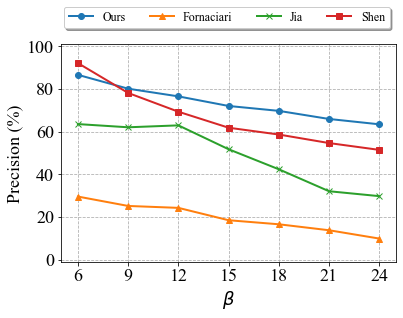

In [154]:
# x is the x axis for plotting from 6 to 24 with step 3
x_beta = np.arange(6, 25, 3)
# y is the data for plotting
# y[0] is the data for our method
# y[1] is the data for Fornaciari's method
# y[2] is the data for Jia's method
# y[3] is the data for Shen's method
y_pre = np.array([[86.7, 80.2, 76.6, 72.1, 69.8, 66.0, 63.5],
              [29.6, 25.2, 24.3, 18.5, 16.6, 13.8, 9.9],
              [63.6, 62.1, 63.0, 51.8, 42.4, 32.1, 29.8],
              [92.2, 78.2, 69.4, 61.9, 58.7, 54.7, 51.5]])
# data is the combination of x and y
data_pre_beta = np.vstack((x_beta, y_pre))
# print(data_pre_beta)
plot_line_chart(data=data_pre_beta, pic_name='Precision_beta', save=True, xlabel="$\\beta$", ylabel="Precision (%)", text_location=12, xlim=24, ylim=100,
                labellist=['Ours', 'Fornaciari', 'Jia', 'Shen'],
                ystep=20, xstep=3, xlimD=6, ylimD=0)


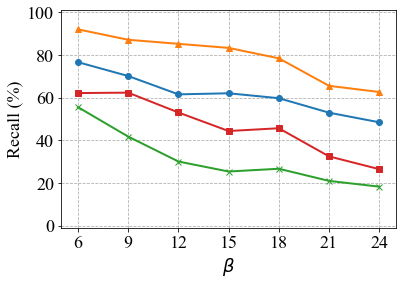

In [155]:
# x is the x axis for plotting from 6 to 24 with step 3
x_beta = np.arange(6, 25, 3)
# y is the data for plotting
# y[0] is the data for our method
# y[1] is the data for Fornaciari's method
# y[2] is the data for Jia's method
# y[3] is the data for Shen's method
y_recall = np.array([[76.7, 70.2, 61.6, 62.1, 59.8, 53.0, 48.5],
                  [92.1, 87.2, 85.3, 83.4, 78.5, 65.6, 62.7],
                  [55.6, 41.8, 30.1, 25.4, 26.7, 21.0, 18.3],
                  [62.2, 62.4, 53.1, 44.4, 45.7, 32.5, 26.5]])
# data is the combination of x and y
data_recall_beta = np.vstack((x_beta, y_recall))
# print(data_pre_beta)
plot_line_chart(data=data_recall_beta, pic_name='Recall_beta', save=True, xlabel="$\\beta$", ylabel="Recall (%)", text_location=12, xlim=24, ylim=100,
                labellist=['Ours', 'Fornaciari', 'Jia', 'Shen'],
                ystep=20, xstep=3, xlimD=6, ylimD=0, legend=False)


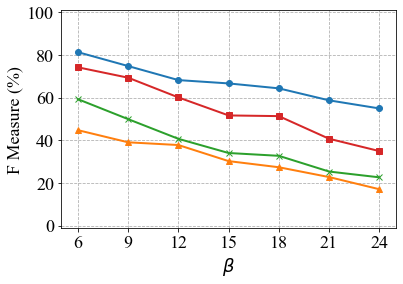

In [157]:
# print(np.size(y_pre,1))
# print(y_pre[1])
y_fMeasure = fMeasureArray(y_pre, y_recall)
data_fMeasure_beta = np.vstack((x_beta, y_fMeasure))
plot_line_chart(data=data_fMeasure_beta, pic_name='F1_beta', save=True, xlabel="$\\beta$", ylabel="F Measure (%)", text_location=12, xlim=24, ylim=100,
                labellist=['Ours', 'Fornaciari', 'Jia', 'Shen'],
                ystep=20, xstep=3, xlimD=6, ylimD=0, legend=False)


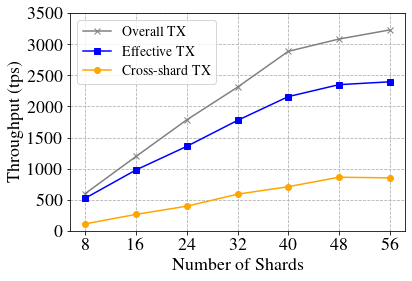

In [22]:
data = np.array([[1, 2, 3], [4, 5, 6]])

def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i],markersize=6)
        # for j, val in enumerate(y[i,:]):
        #     if i==1:
        #         leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #     else:
        #         leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend(loc=0)
    leftaxis.set_yticks(np.arange(0,3501,500))
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

plot_line_chart(data=data,pic_name='throughtput',save=True,xlabel="Number of Shards", ylabel="Throughput (tps)",text_location=50,ylim=3500,labellist=['Overall TX','Effective TX','Cross-shard TX'],colorlist = ['grey','blue','orange','black','blue','green'],markerlist = ['x','s','o','s','v','1','v'])

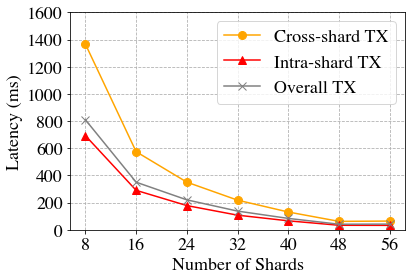

In [2]:
df = pd.read_csv('source/latency.csv')

data = np.transpose(df.to_numpy())
data = data.round(1)


def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i],markersize=8)
        # for j, val in enumerate(y[i,:]):
        #     if i==1:
        #         leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #     else:
        #         leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    leftaxis.set_yticks(np.arange(0,ylim+1,200))
    # print(x)
    leftaxis.legend(loc=0)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

plot_line_chart(data=data,pic_name='latency',save=True,xlabel="Number of Shards", ylabel="Latency (ms)",text_location=30,ylim=1600,labellist=['Cross-shard TX', 'Intra-shard TX', 'Overall TX'])

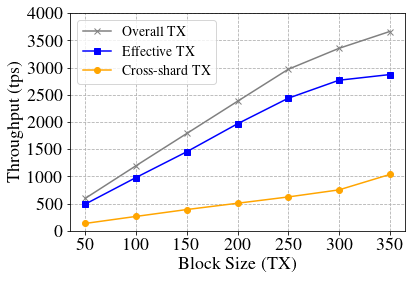

In [27]:
def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i])
        # for j, val in enumerate(y[i,:]):
        #     if i==1:
        #         leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #     else:
        #         leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    leftaxis.set_yticks(np.arange(0,4001,500))
    # print(x)
    leftaxis.legend(loc=0)
    if ytick_k:
        plt.yticks(np.linspace(0,xlim,xscale+1),np.linspace(0,10,xscale+1))
        plt.xticks(np.linspace(8,64,8))
        leftaxis.set_xlim(4, 68)
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

data=np.loadtxt('source/blk_size.txt')
data=np.transpose(data)
data=data.round(1)

plot_line_chart(data=data,pic_name='blk_size_throughput',save=True,xlabel="Block Size (TX)", ylabel="Throughput (tps)",text_location=30,ylim=4000,labellist=['Overall TX','Effective TX','Cross-shard TX'],colorlist = ['grey','blue','orange','black','blue','green'],markerlist = ['x','s','o','s','v','1','v'])

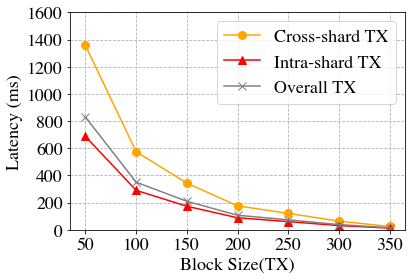

In [3]:
df = pd.read_csv('source/latency_blksize.csv')
data = np.transpose(df.to_numpy())
data = data.round(1)

def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i],markersize=8)
        # for j, val in enumerate(y[i,:]):
        #     if i==1:
        #         if j<4:
        #             leftaxis.text(x[j], val-4*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #         else:
        #             if j>4:
        #                 leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #             else:
        #                 leftaxis.text(x[j], val+2.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9,})
        #     else:
        #         if j>3:
        #             if j==4:
        #                 if i==0:
        #                     leftaxis.text(x[j], val+(5-i)*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #                 else:
        #                     leftaxis.text(x[j], val+(6-i)*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #             else:
        #                 leftaxis.text(x[j], val+(6-i)*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #         else:
        #             leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    leftaxis.legend(loc=0)
    leftaxis.set_yticks(np.arange(0,ylim+1,200))
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

plot_line_chart(data=data,pic_name='latency-blksize',save=True,xlabel="Block Size(TX)", ylabel="Latency (ms)",text_location=25,ylim=1600,labellist=['Cross-shard TX', 'Intra-shard TX', 'Overall TX'])

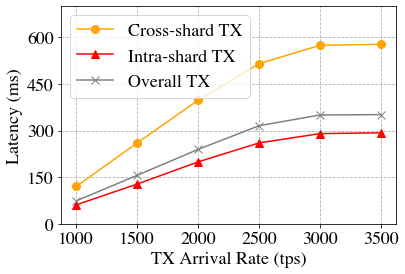

In [4]:
df = pd.read_csv('source/latency_txar.txt')
data = np.transpose(df.to_numpy())
data = data.round(1)

def plot_line_chart(data,pic_name='txrate',save=False,xlabel="TX rate / (TXs/Sec)",ylabel="Throughput (tps)",text_location=50,ylim=2800,labellist=['bsize=100','bsize=150','bsize=80','bsize=50'],ytick_k=False,xlim=1000000,xscale=5,colorlist = ['orange','red','grey','black','blue','green'],markerlist = ['o','^','x','s','v','1','v']):
    x = data[0,:]
    ynum = np.size(data,0)-1
    y = data[1:ynum+1,:]
    fig, leftaxis = plt.subplots(figsize=(6, 4))
    for i in range(ynum):
        leftaxis.plot(x, y[i,:], color=colorlist[i], label=labellist[i],zorder=2,marker=markerlist[i],markersize=8)
        # for j, val in enumerate(y[i,:]):
        #     if i==1:
        #         if j==0:
        #             leftaxis.text(x[j], val+1*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})  
        #             # ,'color':'blue'
        #         else:                  
        #             leftaxis.text(x[j], val-4.5*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})
        #     else:
        #         if j==0:
        #             leftaxis.text(x[j], val+(5-i)*text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})  
        #             # ,'color':'blue'
        #         else:
        #             leftaxis.text(x[j], val+text_location, val, horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':9})

    leftaxis.grid(axis='y',linestyle='--',zorder=0)
    leftaxis.grid(axis='x',linestyle='--',zorder=0)
    
    leftaxis.set_xlabel(xlabel)
    leftaxis.set_ylabel(ylabel)
    leftaxis.set_ylim(0, ylim)
    leftaxis.set_xticks(x, x.astype(int))
    # print(x)
    leftaxis.legend()
    leftaxis.set_yticks(np.arange(0,ylim+1,150))
    if save:
        plt.savefig("pic/"+time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())+"_Figure_"+pic_name+".png", dpi=600, bbox_inches='tight')
    plt.show()

plot_line_chart(data=data,pic_name='latency-txar',save=True,xlabel="TX Arrival Rate (tps)", ylabel="Latency (ms)",text_location=12,ylim=700,labellist=['Cross-shard TX', 'Intra-shard TX', 'Overall TX'])

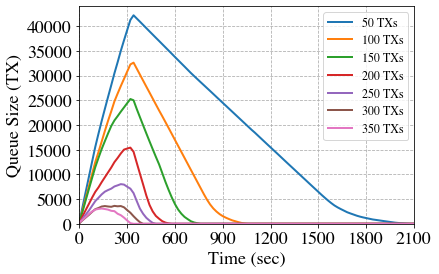

In [45]:

plot_line_chart(data=simpledata,pic_name='qtb',save=False,xlabel="Time (sec)", ylabel="Queue Size (TX)",text_location=12,xlim=2100, ylim=44000,labellist=['50 TXs','100 TXs','150 TXs','200 TXs','250 TXs','300 TXs','350 TXs'],xstep=300)

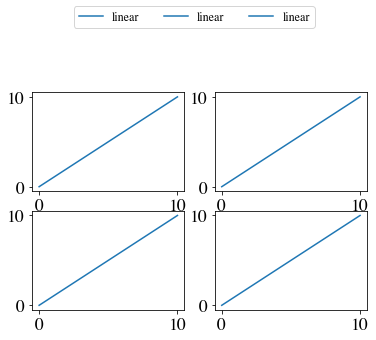

In [68]:
fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=2)

for ax in fig.axes:
    ax.plot([0, 10], [0, 10], label='linear')

lines = []
labels = []
lines_01, labels_01 = fig.axes[2].get_legend_handles_labels()
lines.extend(lines_01)
labels.extend(labels_01)
lines_02, labels_02 = fig.axes[3].get_legend_handles_labels()
lines.extend(lines_02)
labels.extend(labels_02)
lines_03, labels_03 = fig.axes[-1].get_legend_handles_labels()
lines.extend(lines_03)
labels.extend(labels_03)

# 图例的位置，bbox_to_anchor=(0.5, 0.92),
fig.legend(lines, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.2), fontsize=12)
plt.show()
